## Proyecto 1

Empezamos importando nuestras librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


Creamos la funcipón para la carga de datos. Aquí creamos nuestro dataframe, mezclamos su contenido y separamos nuestros datasets de entranamiento y y pruebas.

In [3]:
def cargaDatos():
    df = pd.DataFrame(np.load('proyecto_training_data.npy'), columns= ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
    df= df.sample(frac=1, ignore_index=True)
    filas = len(df)
    slicing = int(filas*0.8)
    df_entre = df[:slicing]
    df_prueba = df[slicing:]

    return df, df_entre, df_prueba

Creamos una clase para nuestros nuevos dataframes y los almacenamos en un objeto para seguir trabajando con la misma data durante todo el desarrollo del programa

In [4]:
class dataframes:
    def __init__(self, df, df_entre, df_prueba):
        self.df = df
        self.df_entre = df_entre
        self.df_prueba = df_prueba

df, df_entre, df_prueba = cargaDatos()

data = dataframes(df, df_entre, df_prueba)


Creamos la función para el análisis exploratorio de datos

In [5]:
def analisis():
    analisisExp = data.df_entre
    analisisExp = analisisExp.describe().loc[['mean','max', 'min', 'std'],:]
    analisisExp = analisisExp.rename(index={'mean': 'Media','max':'Máximo', 'min':'Mínimo', 'std': 'Desviación estándar'})

    rango = pd.DataFrame({
            'SalePrice': [analisisExp['SalePrice'].max() - analisisExp['SalePrice'].min()],
            'OverallQual': [analisisExp['OverallQual'].max() - analisisExp['OverallQual'].min()],
            '1stFlrSF': [analisisExp['1stFlrSF'].max() - analisisExp['1stFlrSF'].min()],
            'TotRmsAbvGrd': [analisisExp['TotRmsAbvGrd'].max() - analisisExp['TotRmsAbvGrd'].min()],
            'YearBuilt': [analisisExp['YearBuilt'].max() - analisisExp['YearBuilt'].min()],
            'LotFrontage': [analisisExp['LotFrontage'].max() - analisisExp['LotFrontage'].min()]},
            index= ['Rango'])

    analisisExp = pd.concat([analisisExp, rango])
    analisisExp = analisisExp.loc[['Media','Máximo', 'Mínimo', 'Rango', 'Desviación estándar'],:]
    return analisisExp


In [10]:
def histogramas():
    for columna in data.df_entre.columns:
        sb.histplot(data.df_entre[columna], color='green').set(title=f'Histograma de {columna}', xlabel=columna, ylabel='Frecuencia')
        plt.show()

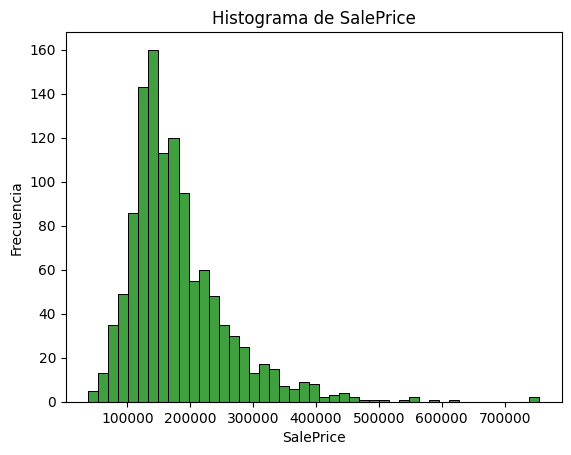

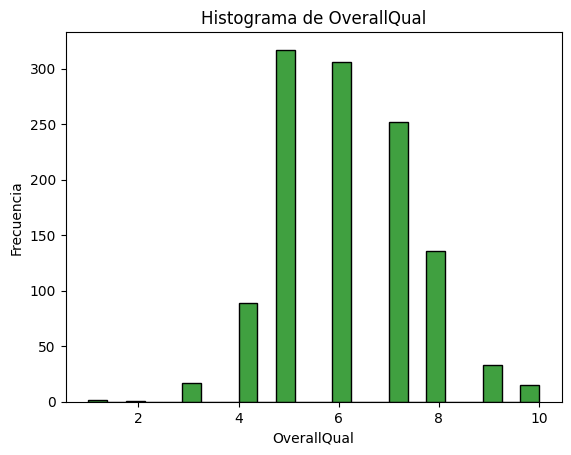

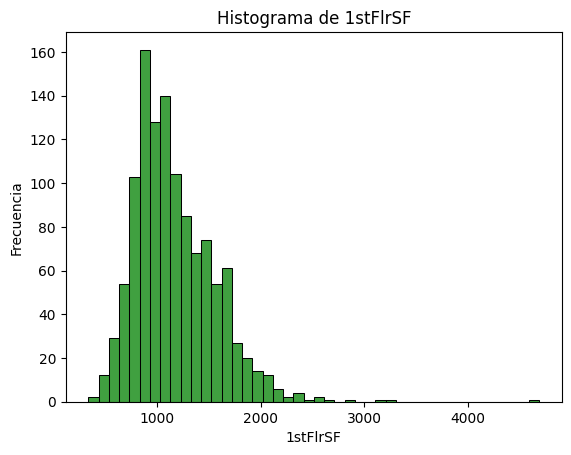

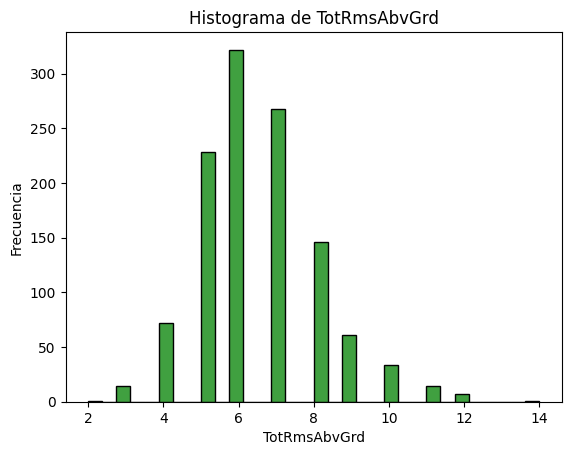

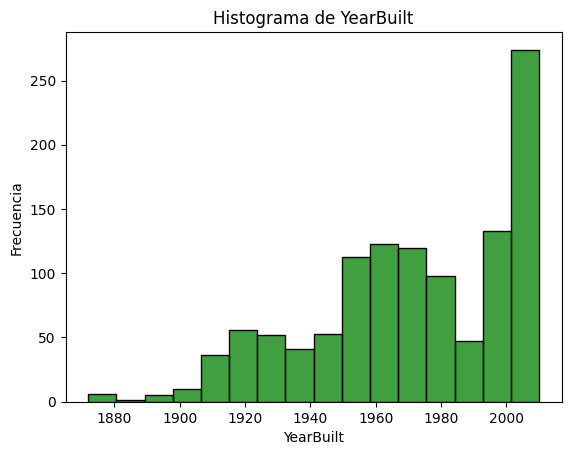

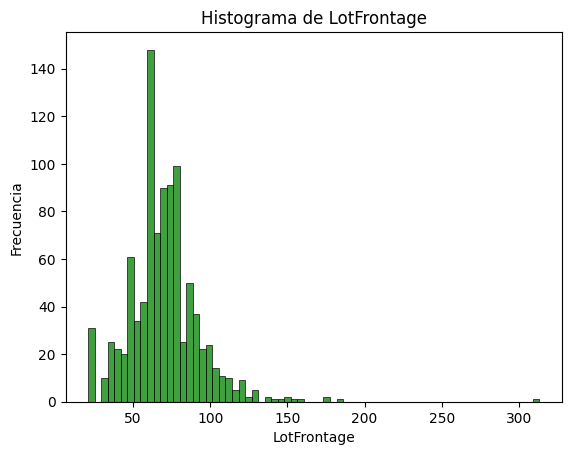

In [11]:
histogramas()